<a href="https://colab.research.google.com/github/kaus145/Customer-Churn-Prediction/blob/main/Customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [236]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# data preprocessing

In [237]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')

In [238]:
dataset.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...              

In [239]:
dataset.shape

(10000, 14)

In [240]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [241]:
dataset.select_dtypes(include='object')

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [242]:
len(dataset.select_dtypes(include='object').columns)

3

In [243]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [244]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

11

In [245]:
#statistical summary
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [246]:
#missing values
dataset.isnull().values.any()

False

# Dealing with categorical data

In [247]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [248]:
dataset=dataset.drop(columns=['RowNumber','CustomerId','Surname'])

In [249]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [250]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [251]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [252]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [253]:
dataset.groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [254]:
dataset.groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [255]:
#one hot encoding
dataset=pd.get_dummies(data=dataset,drop_first=True)

In [256]:
#countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


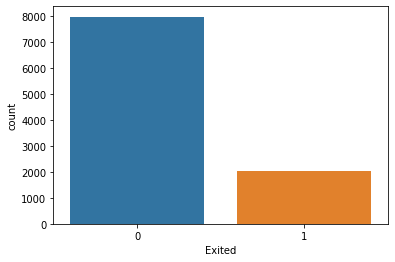

In [257]:
sns.countplot(dataset['Exited'])

In [258]:
(dataset.Exited==0).sum()

7963

In [259]:
(dataset.Exited==1).sum()

2037

In [260]:
dataset_2=dataset.drop(columns='Exited')

In [261]:
dataset_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


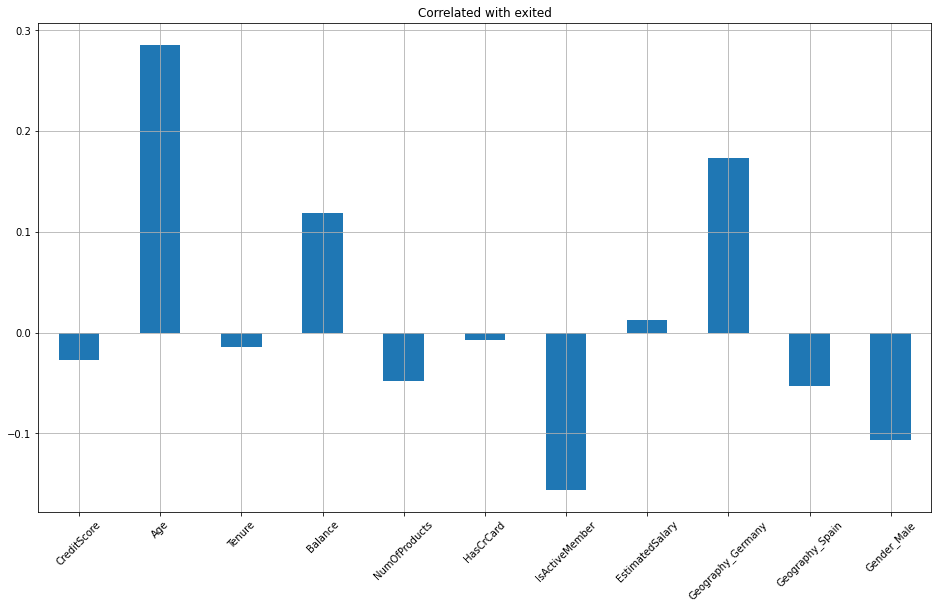

In [262]:
dataset_2.corrwith(dataset['Exited']).plot.bar(figsize=(16,9),title='Correlated with exited',rot=45,grid=True)

In [263]:
corr=dataset.corr()

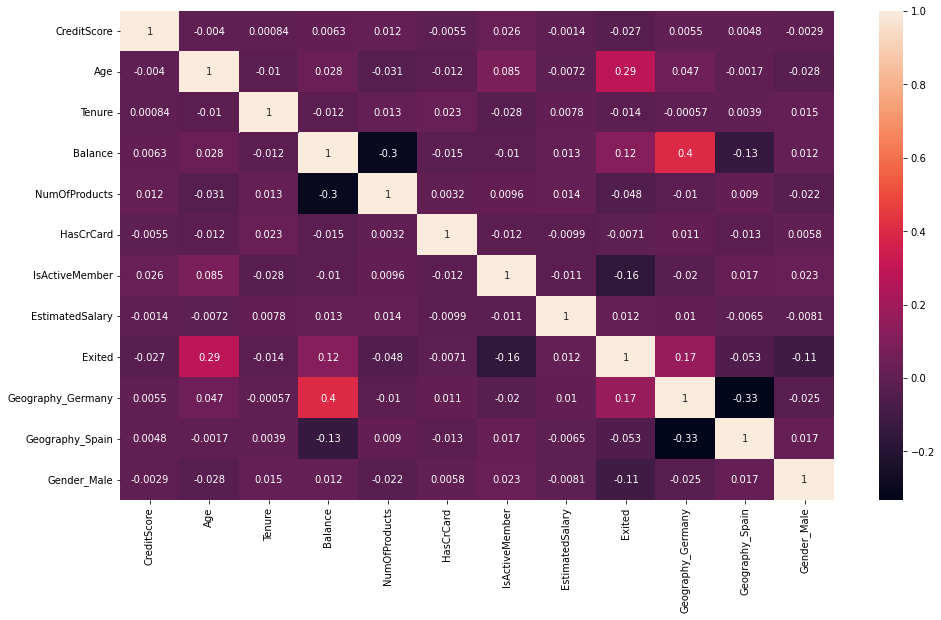

In [264]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

# Splitting the dataset

In [265]:
x=dataset.drop(columns='Exited')

In [266]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [267]:
y=dataset['Exited']

In [268]:
from sklearn.model_selection import train_test_split

In [269]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

In [270]:
x_train.shape

(8000, 11)

In [271]:
y_train.shape

(8000,)

In [272]:
x_test.shape

(2000, 11)

# Feature Scaling

In [273]:
from sklearn.preprocessing import StandardScaler

In [274]:
sc=StandardScaler()

In [275]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [276]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [277]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# Logistic Regression

In [278]:
from sklearn.linear_model import LogisticRegression

In [279]:
classifier_lr=LogisticRegression(random_state=0)
classifier_lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [280]:
y_pred=classifier_lr.predict(x_test)

In [281]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [282]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [283]:
results=pd.DataFrame([['logistic Regression',acc,f1,pre,rec]],
                      columns=['Model','Accuracy','F1 score','Precision score','Recall score'])

In [284]:
results

,Model,Accuracy,F1 score,Precision score,Recall score
0,logistic Regression,0.811,0.336842,0.581818,0.237037


In [285]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


# Cross Validation

In [286]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_lr,X=x_train,y=y_train,cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("standard Deviation is {:.2f}".format(accuracies.std()*100))

Accuracy is 80.84 %
standard Deviation is 0.88


# Random Forest Classifier

In [287]:
from sklearn.ensemble import RandomForestClassifier

In [288]:
classifier_rf=RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [289]:
y_pred=classifier_rf.predict(x_test)

In [290]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [291]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [292]:
model_results=pd.DataFrame([['Random Forest',acc,f1,pre,rec]],
                      columns=['Model','Accuracy','F1 score','Precision score','Recall score'])

In [293]:
model_results

,Model,Accuracy,F1 score,Precision score,Recall score
0,Random Forest,0.867,0.613372,0.745583,0.520988


In [294]:
results.append(model_results,ignore_index=True)

,Model,Accuracy,F1 score,Precision score,Recall score
0,logistic Regression,0.811,0.336842,0.581818,0.237037
1,Random Forest,0.867,0.613372,0.745583,0.520988


In [295]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1523   72]
 [ 194  211]]


# Cross Validation

In [296]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_rf,X=x_train,y=y_train,cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("standard Deviation is {:.2f}".format(accuracies.std()*100))

Accuracy is 85.96 %
standard Deviation is 1.02


# XG boost classifier

In [297]:
from xgboost import XGBClassifier
classifier_xgb=XGBClassifier()
classifier_xgb.fit(x_train,y_train)

XGBClassifier()

In [298]:
y_pred=classifier_xgb.predict(x_test)

In [299]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [300]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [301]:
model_results=pd.DataFrame([['XGB classifier',acc,f1,pre,rec]],
                      columns=['Model','Accuracy','F1 score','Precision score','Recall score'])

In [302]:
results.append(model_results,ignore_index=True)

,Model,Accuracy,F1 score,Precision score,Recall score
0,logistic Regression,0.8110,0.336842,0.581818,0.237037
1,XGB classifier,0.8645,0.605531,0.737589,0.513580


In [303]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1521   74]
 [ 197  208]]


# Cross Validation

In [304]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_xgb,X=x_train,y=y_train,cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("standard Deviation is {:.2f}".format(accuracies.std()*100))

Accuracy is 86.25 %
standard Deviation is 1.02


# Hyperparameter tuning

In [305]:
from sklearn.model_selection import RandomizedSearchCV

In [306]:
parameters={
    'learning rate':[0.05,0.1,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,7,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}


In [307]:
randomized_search=RandomizedSearchCV(estimator=classifier_xgb,param_distributions=parameters,n_iter=5,n_jobs=-1,scoring='roc_auc',cv=5,verbose=3)

In [308]:
randomized_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [309]:
randomized_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.4,
 'learning rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5}

In [310]:
randomized_search.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.4, learning rate=0.1, max_depth=6,
              min_child_weight=5)

# Final Model

In [311]:
from xgboost import XGBClassifier
classifier=XGBClassifier(colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=5,
              min_child_weight=5)
classifier.fit(x_train,y_train)


XGBClassifier(colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=5,
              min_child_weight=5)

In [312]:
y_pred=classifier.predict(x_test)

In [313]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [314]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [315]:
model_results=pd.DataFrame([['Final classifier',acc,f1,pre,rec]],
                      columns=['Model','Accuracy','F1 score','Precision score','Recall score'])

In [316]:
results=results.append(model_results,ignore_index=True)

In [317]:
results

,Model,Accuracy,F1 score,Precision score,Recall score
0,logistic Regression,0.811,0.336842,0.581818,0.237037
1,Final classifier,0.861,0.601719,0.716724,0.518519


In [318]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1512   83]
 [ 195  210]]


# Cross Validation

In [319]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("standard Deviation is {:.2f}".format(accuracies.std()*100))

Accuracy is 86.20 %
standard Deviation is 0.98


# Predicting a single observation

In [320]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [332]:
single_obs=[[625,45,12500.01,1,0,0,1,101348.88,0,0,1]]

In [333]:
single_obs

[[625, 45, 12500.01, 1, 0, 0, 1, 101348.88, 0, 0, 1]]

In [334]:
classifier.predict(sc.transform(single_obs))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([0])